In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
 

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)

In [ ]:
x = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  #target



In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [12]:
y_pred=model.predict(x_test)

In [9]:
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9153094462540716
Confusion Matrix:
[[499  32]
 [ 46 344]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.91      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921

ROC AUC Score: 0.9108938142836448


In [13]:
cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy')
print(f"cross validated accuracy : {cv_score.mean()}")

cross validated accuracy : 0.9028444779779307


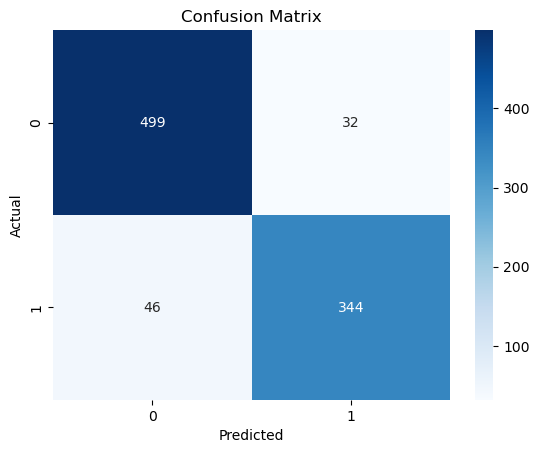

In [11]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()